In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv(r"D:\AI WORKSHOP\TASK\KMEANS,HIERARCHIAL,DBSCAN\CC_GENERAL_preprocessed.csv")
features=['BALANCE','PURCHASES','CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT',
          'PURCHASES_FREQUENCY','ONEOFF_PURCHASES_FREQUENCY','CASH_ADVANCE_FREQUENCY',
          'TENURE','PRC_FULL_PAYMENT']
df_features=df[features]


In [3]:
for col in ['PURCHASES','CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT']:
    Q1=df_features[col].quantile(0.25)
    Q3=df_features[col].quantile(0.75)
    IQR=Q3-Q1
    upper=Q3+1.5*IQR
    df_features[col]=np.where(df_features[col]>upper, upper, df_features[col])
scaler=RobustScaler()
df_scaled = scaler.fit_transform(df_features)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_components, columns=['PC1','PC2'])


C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_26988\1576684484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[col]=np.where(df_features[col]>upper, upper, df_features[col])
C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_26988\1576684484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_features[col]=np.where(df_features[col]>upper, upper, df_features[col])
C:\Users\JHANANISHRI\AppData\Local\Temp\ipykernel_26988\1576684484.py:6: SettingWithCopyWarning: 
A value is trying to be se

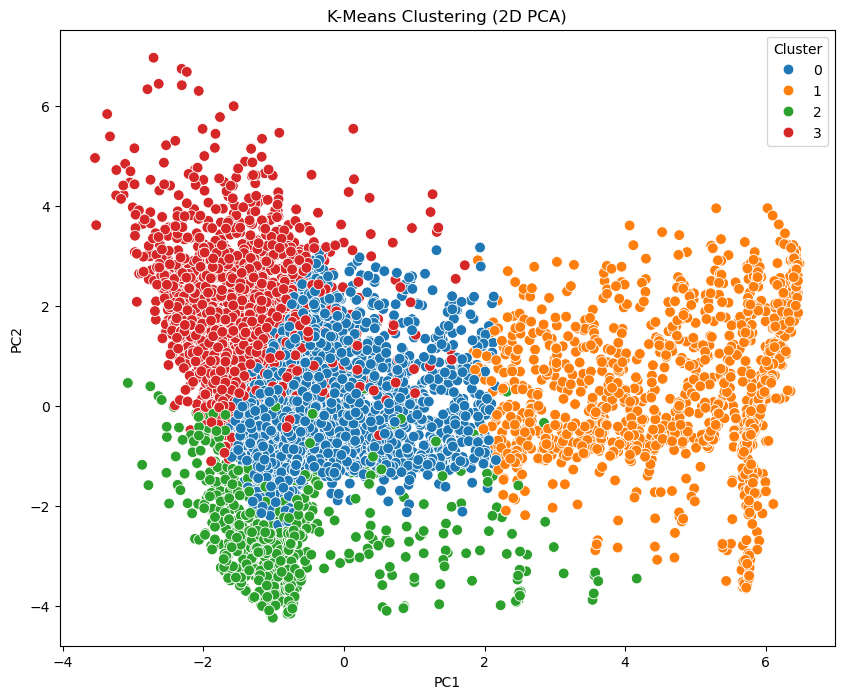

In [4]:
best_k=4
kmeans=KMeans(n_clusters=best_k, random_state=42, n_init=50)
kmeans_labels=kmeans.fit_predict(df_scaled)
pca_df['KMeans_Cluster']=kmeans_labels

plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1',y='PC2',hue='KMeans_Cluster',data=pca_df,palette='tab10',s=60)
plt.title('K-Means Clustering (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(False)
plt.show()

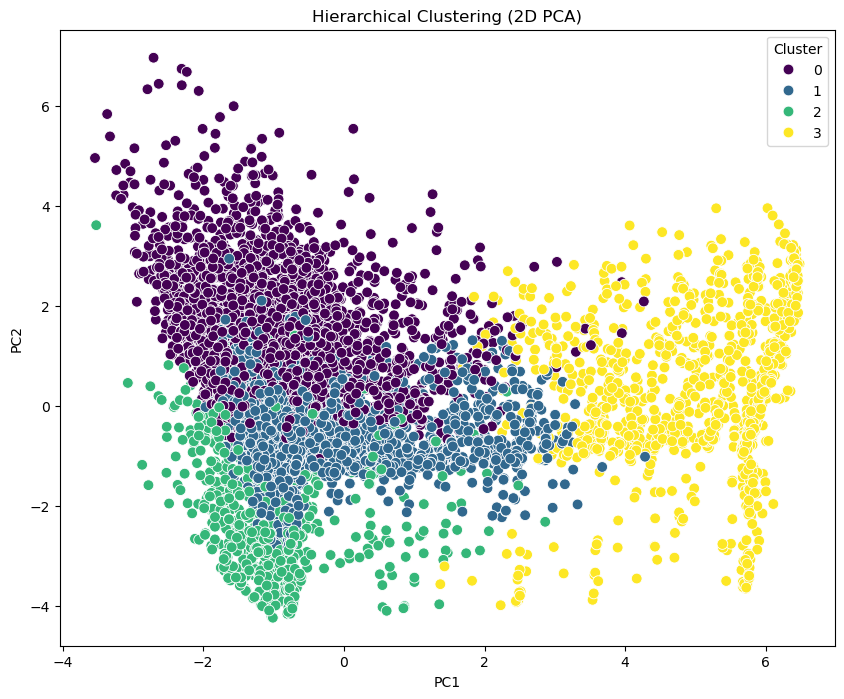

In [5]:
linkage_method='ward'
hierarchical=AgglomerativeClustering(n_clusters=best_k, linkage=linkage_method)
hier_labels=hierarchical.fit_predict(df_scaled)
pca_df['Hierarchical_Cluster']=hier_labels

plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1',y='PC2',hue='Hierarchical_Cluster',data=pca_df,palette='viridis',s=60)
plt.title('Hierarchical Clustering (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(False)
plt.show()

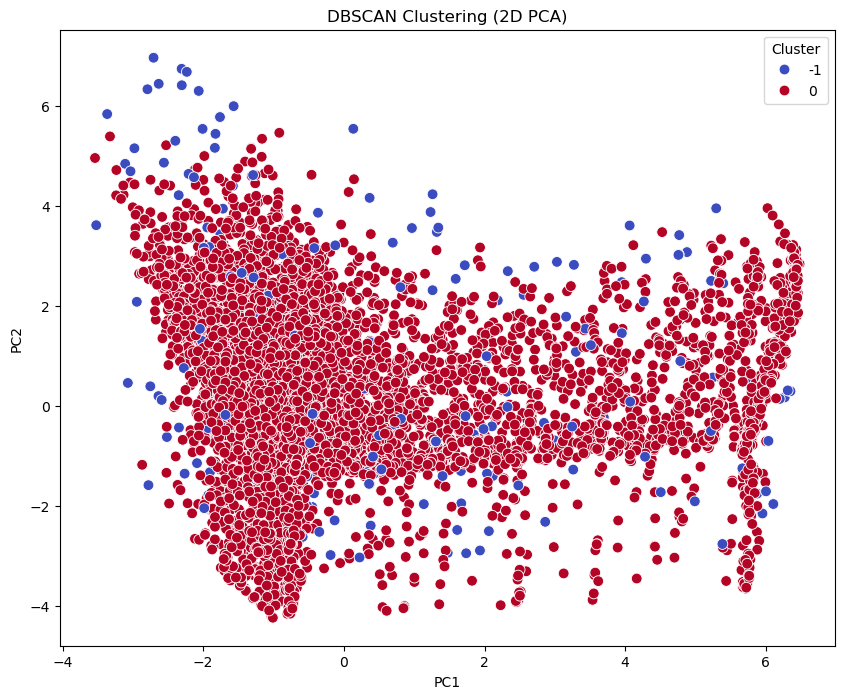

In [6]:
dbscan=DBSCAN(eps=1.5, min_samples=5)  
db_labels=dbscan.fit_predict(df_scaled)
pca_df['DBSCAN_Cluster']=db_labels

plt.figure(figsize=(10,8))
sns.scatterplot(x='PC1',y='PC2',hue='DBSCAN_Cluster',data=pca_df,palette='coolwarm',s=60)
plt.title('DBSCAN Clustering (2D PCA)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')
plt.grid(False)
plt.show()


In [7]:

from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
best_k = 2
best_sil = -1
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42, n_init=50)
    labels = km.fit_predict(df_scaled)
    sil = silhouette_score(df_scaled, labels)
    if sil > best_sil:
        best_sil = sil
        best_k = k
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=50)
kmeans_labels = kmeans.fit_predict(df_scaled)
kmeans_sil = silhouette_score(df_scaled, kmeans_labels)
kmeans_dbi = davies_bouldin_score(df_scaled, kmeans_labels)
kmeans_ch = calinski_harabasz_score(df_scaled, kmeans_labels)
kmeans_inertia = kmeans.inertia_

In [8]:
linkages=['ward', 'complete', 'average', 'single']
best_link='ward'
best_sil_h=-1
for link in linkages:
    model=AgglomerativeClustering(n_clusters=best_k, linkage=link)
    labels=model.fit_predict(df_scaled)
    sil=silhouette_score(df_scaled, labels)
    if sil > best_sil_h:
        best_sil_h=sil
        best_link=link
hierarchical=AgglomerativeClustering(n_clusters=best_k, linkage=best_link)
hier_labels=hierarchical.fit_predict(df_scaled)
hier_sil=silhouette_score(df_scaled, hier_labels)
hier_dbi=davies_bouldin_score(df_scaled, hier_labels)
hier_ch=calinski_harabasz_score(df_scaled, hier_labels)


In [10]:
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(df_scaled)
distances, _ = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances[:, -1])
eps = distances[int(len(distances) * 0.95)]


In [ ]:
import gradio as gr
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

# Define the features to be used for clustering
FEATURES = [
    'BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT',
    'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
    'CASH_ADVANCE_FREQUENCY', 'TENURE', 'PRC_FULL_PAYMENT'
]

# --- Model Training and Saving Function ---
def train_and_save_models(df):
    """Trains and saves the RobustScaler, PCA, and KMeans models."""
    print("Model files not found. Training new models...")
    
    # Select features and create a copy to avoid SettingWithCopyWarning
    df_features = df[FEATURES].copy()
    
    # Handle missing values
    df_features.fillna(df_features.mean(), inplace=True)
    
    # Handle outliers for specified columns
    for col in ['PURCHASES', 'CASH_ADVANCE', 'PAYMENTS', 'CREDIT_LIMIT']:
        Q1 = df_features[col].quantile(0.25)
        Q3 = df_features[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        df_features.loc[df_features[col] > upper_bound, col] = upper_bound

    # Scale the data using RobustScaler
    scaler = RobustScaler()
    df_scaled = scaler.fit_transform(df_features)
    
    # Apply PCA for dimensionality reduction
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(df_scaled)
    
    # Train the KMeans model
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    
    # Save the models and transformers
    joblib.dump(scaler, 'robust_scaler.pkl')
    joblib.dump(pca, 'pca.pkl')
    joblib.dump(kmeans, 'kmeans_model.pkl')
    
    print("Models and transformers saved successfully!")
    return scaler, pca, kmeans

# --- Gradio Function for Clustering Analysis ---
def run_clustering():
    """Performs clustering, calculates metrics, and generates plots."""
    
    # Load data for clustering analysis
    df = pd.read_csv("CC GENERAL.csv")
    df_features = df[FEATURES].copy()
    df_features.fillna(df_features.mean(), inplace=True)
    for col in ['PURCHASES','CASH_ADVANCE','PAYMENTS','CREDIT_LIMIT']:
        Q1 = df_features[col].quantile(0.25)
        Q3 = df_features[col].quantile(0.75)
        IQR = Q3 - Q1
        upper_bound = Q3 + 1.5 * IQR
        df_features.loc[df_features[col] > upper_bound, col] = upper_bound

    scaler = RobustScaler()
    df_scaled = scaler.fit_transform(df_features)
    pca = PCA(n_components=2)
    pca_data = pca.fit_transform(df_scaled)
    pca_df = pd.DataFrame(pca_data, columns=["PC1", "PC2"])

    results = []

    # KMeans
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(df_scaled)
    pca_df['KMeans'] = kmeans_labels
    results.append(["KMeans", silhouette_score(df_scaled, kmeans_labels), 
                    davies_bouldin_score(df_scaled, kmeans_labels), 
                    calinski_harabasz_score(df_scaled, kmeans_labels), 
                    kmeans.inertia_])

    # Hierarchical
    hierarchical = AgglomerativeClustering(n_clusters=4, linkage="ward")
    hier_labels = hierarchical.fit_predict(df_scaled)
    pca_df['Hierarchical'] = hier_labels
    results.append(["Hierarchical", silhouette_score(df_scaled, hier_labels), 
                    davies_bouldin_score(df_scaled, hier_labels), 
                    calinski_harabasz_score(df_scaled, hier_labels), 
                    "N/A"])

    # DBSCAN with dynamic eps calculation
    neighbors = NearestNeighbors(n_neighbors=5)
    neighbors_fit = neighbors.fit(df_scaled)
    distances, _ = neighbors_fit.kneighbors(df_scaled)
    distances = np.sort(distances[:, -1])
    eps = distances[int(len(distances) * 0.95)]
    
    dbscan = DBSCAN(eps=eps, min_samples=5)
    db_labels = dbscan.fit_predict(df_scaled)
    
    pca_df['DBSCAN'] = db_labels
    
    # Handle noise points for metrics calculation
    db_labels_for_metrics = db_labels.copy()
    if -1 in db_labels_for_metrics:
        db_labels_for_metrics[db_labels_for_metrics == -1] = db_labels_for_metrics.max() + 1
    
    if len(np.unique(db_labels_for_metrics)) >= 2:
        db_sil = silhouette_score(df_scaled, db_labels_for_metrics)
        db_dbi = davies_bouldin_score(df_scaled, db_labels_for_metrics)
        db_ch = calinski_harabasz_score(df_scaled, db_labels_for_metrics)
        results.append(["DBSCAN", db_sil, db_dbi, db_ch, "N/A"])
    else:
        na_message = "N/A (Invalid clusters)"
        results.append(["DBSCAN", na_message, na_message, na_message, "N/A"])

    results_df = pd.DataFrame(results, columns=["Model", "Silhouette", "Davies-Bouldin", "Calinski-Harabasz", "Inertia"])

    plots = []
    for col, title, palette in [
        ("KMeans", "KMeans Clustering", "tab10"),
        ("Hierarchical", "Hierarchical Clustering", "viridis"),
        ("DBSCAN", "DBSCAN Clustering", "plasma")
    ]:
        plt.figure(figsize=(6, 5))
        sns.scatterplot(x="PC1", y="PC2", hue=col, data=pca_df, palette=palette)
        plt.title(title, fontsize=14, color="blue")
        plt.xlabel("PC1")
        plt.ylabel("PC2")
        plt.legend(title="Cluster")
        plots.append(plt.gcf())
        plt.close()

    return results_df, plots[0], plots[1], plots[2]

# --- Gradio Function for Prediction ---
def predict_cluster_for_new_data(*args):
    """Predicts the cluster for a new credit card customer."""
    try:
        # Load pre-trained models and transformers
        scaler = joblib.load('robust_scaler.pkl')
        kmeans_model = joblib.load('kmeans_model.pkl')
    except FileNotFoundError:
        return "❌ Error: Model files not found. Please ensure CC GENERAL.csv is in the directory and reload the app."

    # Create a DataFrame with the new input values
    input_data = pd.DataFrame([list(args)], columns=FEATURES)

    # Apply the same preprocessing steps as the training data
    scaled_data = scaler.transform(input_data)
    
    # Predict the cluster
    predicted_cluster = kmeans_model.predict(scaled_data)
    
    return f"The predicted cluster for this customer is: **Cluster {predicted_cluster[0]}**"

def login(username, password):
    """Handles user login."""
    if username == "admin" and password == "1234":  
        return gr.update(visible=False), gr.update(visible=True)
    else:
        return gr.update(visible=True, value="❌ Wrong Username or Password"), gr.update(visible=False)

# Pre-defined metrics for the initial view
predefined_metrics = pd.DataFrame({
    "Model": ["K-Means", "Hierarchical", "DBSCAN"],
    "Silhouette": [0.436897, 0.544746, "N/A (Invalid clusters)"],
    "Davies-Bouldin": [0.986939, 0.329792, "N/A (Invalid clusters)"],
    "Calinski-Harabasz": [4289.943651, 7.417854, "N/A (Invalid clusters)"],
    "Inertia": [71633.215304, "N/A", "N/A"]
})

# --- Main Gradio App Block ---
with gr.Blocks() as demo:
    with gr.Group(visible=True) as login_page:
        gr.HTML("<h1 style='text-align:center; color:#FF5733;'>🔑 Login Page</h1>")
        username = gr.Textbox(label="Username")
        password = gr.Textbox(label="Password", type="password")
        error_msg = gr.Textbox(label="Error", visible=False)
        login_btn = gr.Button("Login ✅")

    with gr.Group(visible=False) as main_page:
        gr.HTML("""
        <h1 style='text-align:center; color: blue; font-size: 40px;'>
        💳 Credit Card Customers Clustering App 
        </h1>
        <p style='text-align:center; color: green;'>
        This app allows you to cluster credit card customers and predict their clusters.
        </p>
        """)
        
        # Two tabs for the combined functionality
        with gr.Tabs():
            # Tab 1: Clustering Results
            with gr.Tab("Clustering Results"):
                gr.HTML("<h3 style='color:purple; text-align:center;'>📊 Predefined Evaluation Metrics</h3>")
                predefined_table = gr.Dataframe(value=predefined_metrics, interactive=False)
                
                run_btn = gr.Button("▶ Run Clustering")
                results_table = gr.Dataframe(headers=["Model","Silhouette","Davies-Bouldin","Calinski-Harabasz","Inertia"], label="📊 New Evaluation Metrics")
                kmeans_plot = gr.Plot(label="KMeans Visualization")
                hier_plot = gr.Plot(label="Hierarchical Visualization")
                dbscan_plot = gr.Plot(label="DBSCAN Visualization")

            # Tab 2: Predict Cluster
            with gr.Tab("Predict Cluster"):
                gr.HTML("<h3 style='color:purple; text-align:center;'>🔮 Enter New Customer Data to Predict Cluster</h3>")
                
                inputs = [
                    gr.Number(label="BALANCE"),
                    gr.Number(label="PURCHASES"),
                    gr.Number(label="CASH_ADVANCE"),
                    gr.Number(label="PAYMENTS"),
                    gr.Number(label="CREDIT_LIMIT"),
                    gr.Number(label="PURCHASES_FREQUENCY"),
                    gr.Number(label="ONEOFF_PURCHASES_FREQUENCY"),
                    gr.Number(label="CASH_ADVANCE_FREQUENCY"),
                    gr.Number(label="TENURE"),
                    gr.Number(label="PRC_FULL_PAYMENT")
                ]
                
                predict_btn = gr.Button("Predict Cluster 🚀")
                prediction_output = gr.Markdown(label="Prediction Result")

    # Connect functions to UI components
    login_btn.click(fn=login, inputs=[username, password], outputs=[error_msg, main_page])
    run_btn.click(fn=run_clustering, outputs=[results_table, kmeans_plot, hier_plot, dbscan_plot])
    predict_btn.click(fn=predict_cluster_for_new_data, inputs=inputs, outputs=prediction_output)

# Check if model files exist, if not, train and save them
if not all(os.path.exists(f) for f in ['robust_scaler.pkl', 'pca.pkl', 'kmeans_model.pkl']):
    try:
        df = pd.read_csv("CC GENERAL.csv")
        train_and_save_models(df)
    except FileNotFoundError:
        print("Error: 'CC GENERAL.csv' not found. Please ensure the file is in the same directory.")
        
if __name__ == "__main__":
    demo.launch()

In [12]:
results=pd.DataFrame({
    'Model': ['K-Means', 'Hierarchical', 'DBSCAN'],
    'Silhouette': [kmeans_sil, hier_sil, db_sil],
    'Davies-Bouldin': [kmeans_dbi, hier_dbi, db_dbi],
    'Calinski-Harabasz': [kmeans_ch, hier_ch, db_ch],
    'Inertia': [kmeans_inertia, np.nan, np.nan]
})
results.head(3)

,Model,Silhouette,Davies-Bouldin,Calinski-Harabasz,Inertia
0,K-Means,0.436897,0.986939,4289.943651,71633.215304
1,Hierarchical,0.544746,0.329792,7.417854,NaN
2,DBSCAN,0.326629,2.349147,218.023658,NaN
